# Application directe du cours

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

## Pour se convaincre de l'efficacité de numpy

<div class="alert alert-info" role="alert">
    <b> Exercice : </b>On veut initialiser un tableau d'entiers allant de 1 à N, puis en calculer la somme. On pourra tester avec $N=10^6$ et <code>%%timeit</code> pour avoir une estimation stable du temps de calcul.
    Proposer 3 implémentations: 1)avec boucle for, 2) par compréhension, 3) avec numpy. <br>
    Que peut-on dire de la vitesse d'exécution? <br>
    Si l'on veut uniquement le résultat, on peut aussi se passer de l'initialisation de la liste (et donc de son cout mémoire). Qu'en est-il du temps de calcul?
</div>

In [38]:
N = 10**6

In [39]:
%%timeit
somme = 0
for i in range(1,N+1):
    somme += i

92.3 ms ± 3.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
sum([i for i in range(1,N+1)])

137 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%%timeit
np.sum(np.arange(1,N+1))

7.09 ms ± 521 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## linalg : fonction basique
<div class="alert alert-info" role="alert">
    <b> Exercice : </b> Calculer le déterminant et l'inverse de la matrice suivante. On vérifiera la qualité du calcul en calculant $||AA^{-1}-I||$. Comment améliorer le résultat? Suggestion: googler "conditionnement". 
$$
\left(\begin{array}{cc} 
1 & 2 & 3\\ 
0 & 5 & -4\\
-1 & 8 & -11.0000000001\\
\end{array}\right)
$$

In [22]:
A = np.array([
    [1,2,3],
    [0,5,4],
    [-1,8,-11.0000000001]
])
det = np.linalg.det(A)
inv = np.linalg.inv(A)
verif = np.linalg.norm(A@inv - np.eye(3))
print(f"{det=}\n{inv=}\n{verif=}")

det=-80.00000000050005
inv=array([[ 1.0875, -0.575 ,  0.0875],
       [ 0.05  ,  0.1   ,  0.05  ],
       [-0.0625,  0.125 , -0.0625]])
verif=2.830524433501838e-16


## Calcul des décimales de $\pi$

<div class="alert alert-info" role="alert">
    <b> Exercice : </b> Ecrire une programme qui calcule les décimales de $\pi$ par la méthode de Monte-Carlo. Le raisonnement est le suivant.<br>
    La surface d'un cercle est $S=\pi r^2$, ainsi, pour calculer $\pi$ il suffit d'évaluer la surface d'un cercle de rayon $r$ connu. Pour plus de simplicité, on choisit $r=1$ et on restreint le domaine au quart de cercle centré dans le coin carré de coté 1. C'est ici qu'intervient la méthode de Monte-Carlo, on va tirer au hasard des points dans ce carré. et compter ceux qui sont à l'intérieur du cercle. Pour un grand nombre de points, on obtient un bonne estimation de $\pi=\frac{pts \; intérieur}{pts \; extrieurs} \times 4$.
    <br>
    On affichera un graphe montrant l'évaluation, similaire à celui-ci pour illustrer la méthodes avec 50 points:
    <img src="monte-carlo.png" alt="MonteCarlo">
    <br>
    Et on observera la convergence de notre évaluation avec le graphe suivant. On fera attention à ne pas recalculer un nouveau cas pour chaque valeur de N.
    <img src="MC-convergence.png" alt="Convergence">
    <br>
    Mais on ne voit finalement pas grand chose sur le graphe, le suivant, en base logarithmique de l'erreur est beaucoup plus parlant:
    <img src="MC-convergence_log.png" alt="Convergence">
    <br>
    Enfin, on évaluera la variabilité de la méthode avec une petite étude statistique pour $N=10^4$ et $N=10^6$.
    <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">N</th>
    <th class="tg-0pky">Valeur moyenne</th>
    <th class="tg-0lax">Sigma</th>
    <th class="tg-0lax">Nombre de tests<br></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">10 000</td>
    <td class="tg-0pky">3.1423039999999998 </td>
    <td class="tg-0lax">0.014777184576231025</td>
    <td class="tg-0lax">50</td>
  </tr>
  <tr>
    <td class="tg-0pky">$10^6$<br></td>
    <td class="tg-0pky">3.1411283199999995<br></td>
    <td class="tg-0lax">0.001587272546729095</td>
    <td class="tg-0lax">50</td>
  </tr>
</tbody>
</table>
</div>

/tmp/ipykernel_12046/704168775.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


3.142604


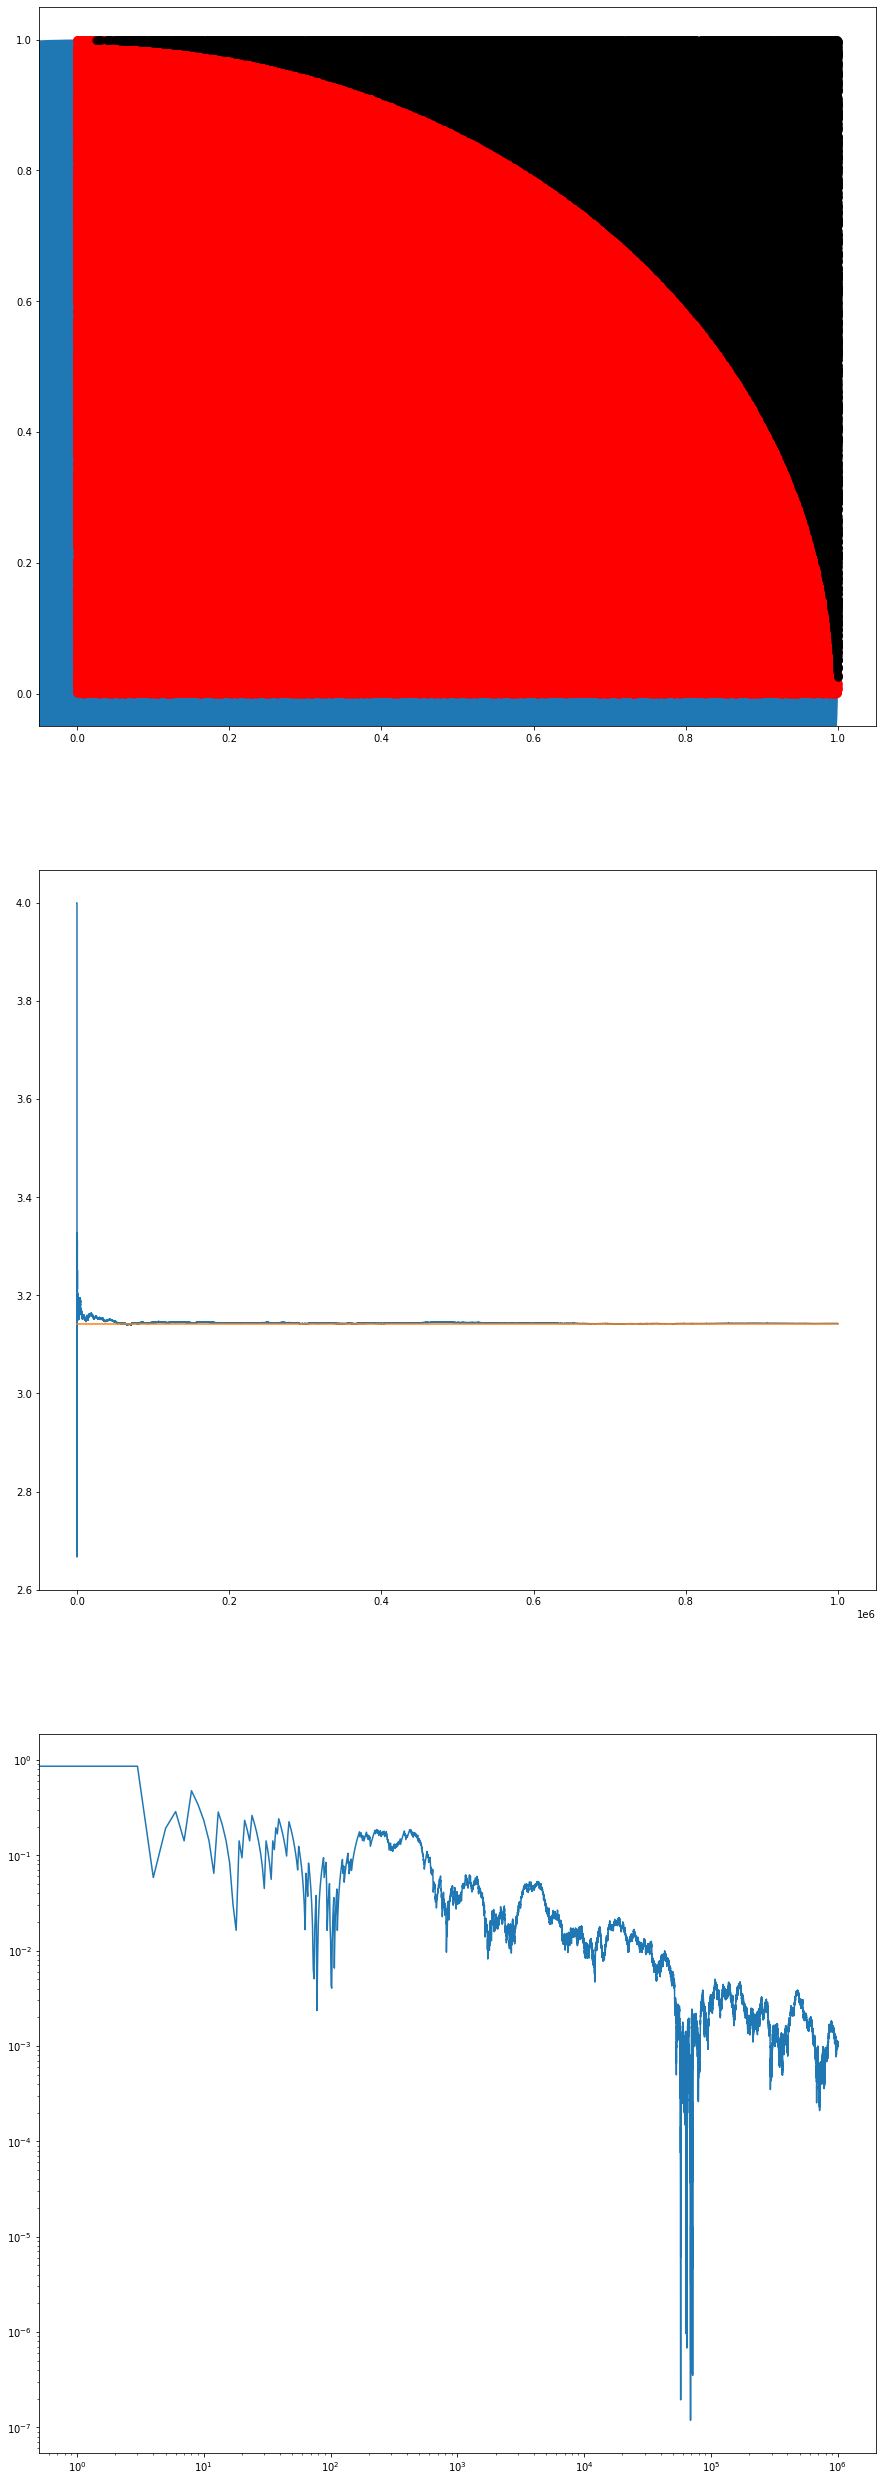

In [68]:
N = 1000000
Xin = []
Yin = []
Xout = []
Yout = []
pi = []
diff = []
for i in range(N):
    x,y = rnd.random(), rnd.random()
    if np.sqrt(x**2 + y**2) <= 1:
        Xin.append(x)
        Yin.append(y)
    else:
        Xout.append(x)
        Yout.append(y)
    pi.append(len(Xin)/(i+1) * 4)
    diff.append(abs(pi[i] - np.pi))
    

fig, ax = plt.subplots(3, 1, figsize=(15, 45))
ax[0].add_artist(plt.Circle((0,0),1))
ax[0].scatter(Xin, Yin, s=60, alpha=0.7, linewidth=1, c = "red")
ax[0].scatter(Xout, Yout, s = 60, alpha = 0.7, linewidth = 1, c = "black")
ax[1].plot(range(N),pi)
ax[1].plot(range(N),np.ones(N) * np.pi)
ax[2].plot(range(N),diff)
ax[2].set_yscale("log", base = 10)
ax[2].set_xscale("log", base = 10)

fig.show()

print(len(Xin)/N * 4)

<div class="alert alert-info" role="alert">
    <b> Exercice Manipulation d'image  :  </b> Créer un masque circulaire pour rendre noir tous les pixels en dehors du cercle.
</div>

<div class="alert alert-info" role="alert">
    <b> Exercice Manipulation d'image  :  </b> Créer une version binaire (blanc en dessous, noir au dessus du seuil) de l'image avec la valeur limite de votre choix.
</div>

<div class="alert alert-info" role="alert">
    <b> Exercice Manipulation d'image  :  </b> Calculer le gradient de cette image et l'afficher. On pourra se contenter d'un calcul au premier ordre avec les voisins direct. <br> $$ ||\nabla p_{ij}||= \sqrt{(p_{i+1j}-p_{i+1j})^2+(p_{ij+1}-p_{ij+1})^2}$$ que l'on pourra, au besoin normaliser. Comparer avec les méthodes des librairies de traitement d'image telle <code>ndime,openCV,PIL</code> et en particulier le filtre de Sobel.
</div>

## Le jeux de la vie

<div class="alert alert-info" role="alert">
    <b> Exercice long : </b> Le Jeu de la vie est un automate cellulaire imaginé par John Horton Conway en 1970. Malgré des règles très simples, il est Turing-complet. C'est un jeu de simulation au sens mathématique. <br> 
    Lire le reste de la présentation <a href="https://fr.wikipedia.org/wiki/Jeu_de_la_vie"> wikipedia</a>. <br> <br> Programmer une version simple avec numpy et matplotlib. On pourra se satisfaire d'un tableau stockant toute la grille et d'une fonction qui avance le temps (en suivant les règles, bien-sûr).
</div>